In [1]:
#Kittipong Wangnok
#School of Physics, Institute of Science, Suranaree University of Technology
#Import module
import sys
import os
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

Beuermann_2011_ephemeris_determination_Figure3_OC_David_data.ipynb
Beuermann_2011_ephemeris_determination_Figure3_OC_David_data.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data.ipynb
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data_zooming_res.pdf
interporate_lnLTT_fit_Beuermann.out
oc_dpleo_Beuermann_Schwope.inp*
oc_dpleo_Beuermann_Schwope_Kittipong.dat
oc_dpleo_Beuermann_Schwope_Kittipong.inp
oc_dpleo_Beuermann_Schwope_Kittipong_David.inp
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [3]:
#Read data ---#1
Input = "oc_dpleo_Beuermann_Schwope_Kittipong_David.inp"
Data   = np.genfromtxt(Input)

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

#print(len(Epoch))

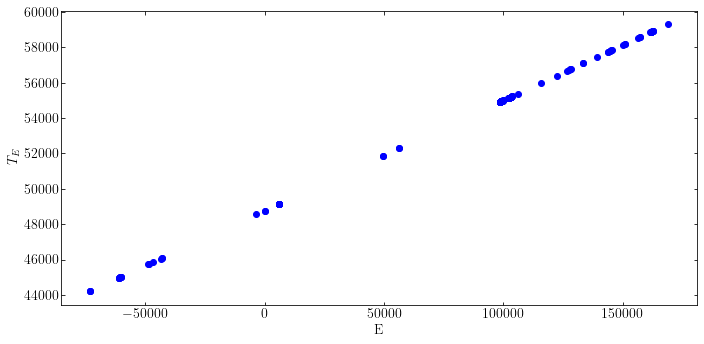

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
#print(len_x)

In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit
import scipy.optimize as optimization 

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = optimization.curve_fit(f = linear_fit, xdata = x, ydata = y, sigma=dy, absolute_sigma=False)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm**0.5)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc**0.5)
#print(covariance)

Slope (m) is  0.062362850125164834
The error of the slope (dm) is  7.282430707702745e-10
Intercept (c) is  48773.21416205974
The error of the intercept (dc) is  7.62552529329447e-05


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
#y_line = linear_fit(x_line, m, c)
ys = m*x + c #just only our data point
Residual = y - ys
#print(y)
#print(ys)
#print(Residual)

#np.savetxt("Linear_fit_period_year_2017KG5.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
#print(Reduced_chisq)

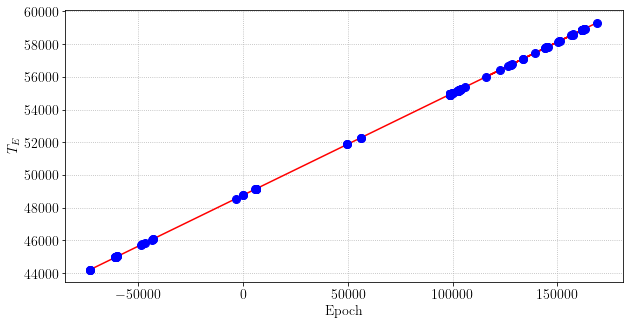

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x, ys, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

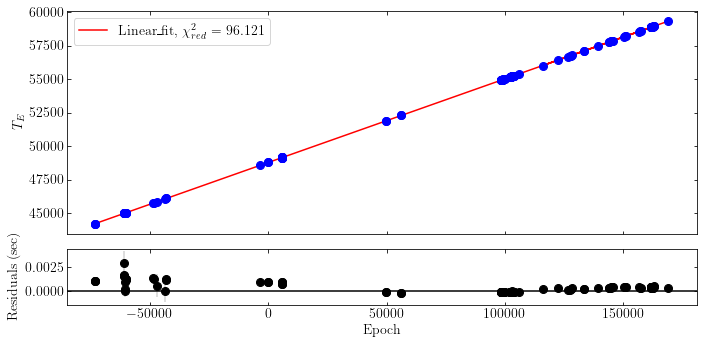

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x, ys, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("oc_linear_dpleo_Beuermann_2011_ephemeris_determination.pdf", dpi=1000)

plt.show()

### Perfrom the fitting

In [10]:
x = Epoch
c = 48773.21416205974
m = 0.062362850125164834

#Input
t = c + m*x
y = T_obs
dy = T_obs_err

#print(len(t))
#print(t)

In [11]:
#Parameter for the fitting
P_orb = 0.062362850125164834
T0 = 48773.21416205974
K = 33.7/(24*60*60)       
P = 10220       
e = 0.39               
w = -1.36          
tau = 53025   

In [12]:
#Function for the fitting
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def LTT(K,P,e,w,tau,t):
    f = TAno(P,tau,e,t)
    return K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

def lnLTT_fit(t,T0,P_orb,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    Epoch = (t-c)/m
    return T0 + P_orb*Epoch + LTT(K,P,e,w,tau,t)

In [13]:
#Fitting process
import scipy.optimize as optimization  
guess = (T0,P_orb,K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(lnLTT_fit, t, y,sigma=dy, absolute_sigma=False,p0=guess)

T0 = params[0]
P_orb = params[1]
K = params[2]
P = params[3]
e = params[4]
w = params[5]
tau = params[6]


dT0 = params_covariance[0,0]
dP_orb = params_covariance[1,1]
dK = params_covariance[2,2]
dP = params_covariance[3,3]
de = params_covariance[4,4]
dw = params_covariance[5,5]
dtau = params_covariance[6,6]

oc_lnLTT_fit = lnLTT_fit(t,*params)
#print(len(oc_lnLTT_fit))

print("The fitting parameters:")
print('T0 = '+str('%0.5f' %(T0)),'+/-', str('%0.5f' %(dT0**0.5)), "[days]")
print('P_bin = '+str('%0.10f' %(P_orb)),'+/-', str('%0.10f' %(dP_orb**0.5)), "[days]")
print('K_d = '+str('%0.6f' %(K)),'+/-', str('%0.6f' %(dK**0.5)), "[days]")
print('K_s = '+str('%0.1f' %(K*24*60*60)),'+/-', str('%0.1f' %((dK**0.5)*24*60*60)), "[s]")
print('P_d = '+str('%0.2f' %(P)),'+/-', str('%0.2f' %(dP**0.5)), "[days]")
print('P_yr = '+str('%0.2f' %(P/365.25)),'+/-', str('%0.2f' %((dP**0.5)/365.25)), "[years]")
print('e = '+str('%0.3f' %(e)),'+/-', str('%0.3f' %(de**0.5)), "[-]")
print('w = '+str('%0.2f' %(w)),'+/-', str('%0.2f' %(dw**0.5)), "[rad]")
print('w_deg = '+str('%0.2f' %(w*(180/np.pi))),'+/-', str('%0.2f' %(dw**0.5*(180/np.pi))), "[deg]")
print('tau = '+str('%0.0f' %(tau)),'+/-', str('%0.0f' %(dtau**0.5)), "[days]")

The fitting parameters:
T0 = 48773.21448 +/- 0.00001 [days]
P_bin = 0.0623628463 +/- 0.0000000001 [days]
K_d = 0.000502 +/- 0.000007 [days]
K_s = 43.4 +/- 0.6 [s]
P_d = 12929.59 +/- 201.11 [days]
P_yr = 35.40 +/- 0.55 [years]
e = 0.345 +/- 0.006 [-]
w = -1.58 +/- 0.03 [rad]
w_deg = -90.40 +/- 1.90 [deg]
tau = 53242 +/- 62 [days]


In [14]:
x_min, x_max = np.amin(t), np.amax(t)
x_line = np.linspace(x_min, x_max)
y_line = lnLTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

print(len(x_line))

Res_lnLTT_fit = y - oc_lnLTT_fit
#np.savetxt("2022_May_week4_Beuermann_Beuermann_ephemeris_lnLTT.out", np.c_[x, Res_lnLTT_fit, dy])

#Reduced_chisqrt
n = 7
dof = len_x - n
Chi_sqr = ((y - oc_lnLTT_fit)**2/(dy)**2)/dof
Reduced_chisq_lnLTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_lnLTT)

50
Reduced_chisq: 2.5027306149629984


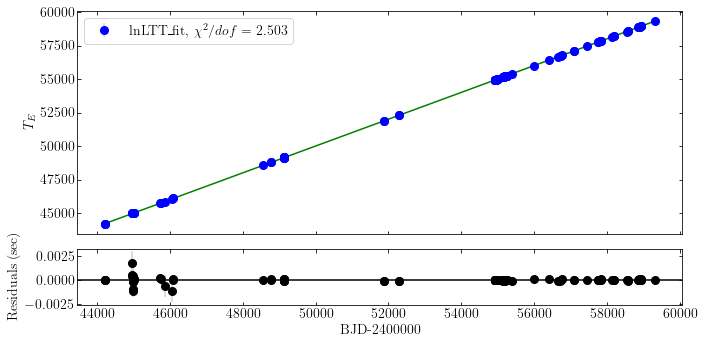

In [15]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))
#plt.xlabel('BJD')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(t, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='lnLTT\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_lnLTT)))
ax0.plot(x_line, y_line, '-', color='green')

#ax0.set_ylim(-40,60)

#ax0.set_ylabel('O-C (sec)')
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')

ax1.errorbar(t, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
ax0.legend(loc="best")
#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [16]:
#Print model
Model = lnLTT_fit(t,*params)
print(Model)

[44214.55323518 44214.61559804 44214.67796089 44968.0212532
 44968.956696   44969.01905886 44978.99711546 44993.9018375
 44993.96420036 44994.02656321 45020.90495313 45021.90275879
 45024.83381291 45731.96619328 45763.83360995 45854.8833715
 46054.9433936  46086.9355353  46086.99789815 48560.5577499
 48773.21502982 48774.21283524 49137.9129036  49143.96209877
 49144.0244616  49144.08682444 49144.95990415 49145.02226699
 49145.08462983 49145.14699267 51870.77694352 51870.90166918
 52284.67905833 52284.74142116 54914.83227016 54914.89463302
 54916.82788175 54919.69657343 54920.75674209 54922.62762796
 54922.68999082 54922.75235368 54922.81471655 54937.78180353
 54937.84416639 54938.71724647 54938.77960933 54940.6504952
 54940.71285806 54940.77522093 54940.83758379 54941.77302673
 54941.83538959 54942.6461068  54942.77083252 54942.83319539
 54942.89555825 54943.70627546 54943.76863832 54943.83100119
 54970.64703204 54970.7093949  54993.65892829 54998.64795729
 55005.63259789 55135.9709805

### Perform the O-C fitting

In [17]:
#New ephemeris
T0_bjd = T0
T0_bjd_err = dT0**0.5
P0_day = P_orb
P0_day_err = dP_orb**0.5

In [18]:
print(T0_bjd, T0_bjd_err)
print(P0_day, P0_day_err)

48773.21448334806 1.4611233219487211e-05
0.062362846347016096 1.4144199847115754e-10


In [19]:
ls

Beuermann_2011_ephemeris_determination_Figure3_OC_David_data.ipynb
Beuermann_2011_ephemeris_determination_Figure3_OC_David_data.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data.ipynb
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data.pdf
Beuermann_2011_ephemeris_determination_Figure3_OC_TNO_data_zooming_res.pdf
interporate_lnLTT_fit_Beuermann.out
oc_dpleo_Beuermann_Schwope.inp*
oc_dpleo_Beuermann_Schwope_Kittipong.dat
oc_dpleo_Beuermann_Schwope_Kittipong.inp
oc_dpleo_Beuermann_Schwope_Kittipong_David.inp
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [20]:
#Please change the input file
DP_Leo_bjd = open("oc_dpleo_Beuermann_Schwope_Kittipong_David.inp",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("oc_dpleo_Beuermann_Schwope_Kittipong_David.inp"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [21]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [22]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    
rerults = OC_cal
f = open('oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-73099	44214.553250	44214.552778	40.761141	13.766508
1	44214.615620	-73098	44214.615620	44214.615141	41.379216	13.766507
2	44214.677980	-73097	44214.677980	44214.677504	41.133293	13.766506
3	44968.023090	-61017	44968.023090	44968.020688	207.550756	98.740629
4	44968.957120	-61002	44968.957120	44968.956130	85.493890	98.740628
5	44969.019620	-61001	44969.019620	44969.018493	97.343965	98.740628
6	44978.997550	-60841	44978.997550	44978.996549	86.508064	98.740613
7	44993.900780	-60602	44993.900780	44993.901269	-42.251863	58.741874
8	44993.963280	-60601	44993.963280	44993.963632	-30.401787	58.741874
9	44994.026420	-60600	44994.026420	44994.025995	36.744288	58.741874
10	45020.905130	-60169	45020.905130	45020.904381	64.670879	18.751883
11	45021.902920	-60153	45021.902920	45021.902187	63.328090	18.751876
12	45024.833860	-60106	45024.833860	45024.833241	53.497643	58.741798
13	45731.966400	-48767	45731.966400	45731.

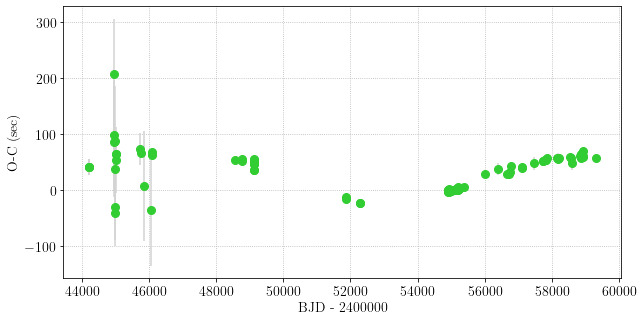

In [23]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
BJD_time = Data[:,0]
Cycle = Data[:,1]
T_O = Data[:,2]
T_C = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
plt.xlabel('BJD - 2400000')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

In [24]:
x = BJD_time
Epoch = (x - T0_bjd)/P0_day 
y = OC_s
dy = OC_s_err
len_x = len(x)

#print(Epoch)

In [25]:
m = 0
c = 0
K = 33.7       #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025   #days

from scipy.optimize import fsolve
from scipy.optimize import curve_fit

def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnLTT_fit(t,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    return K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [26]:
import scipy.optimize as optimization  
guess = (K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(lnLTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess,maxfev = 10000)


K = params[0]
P = params[1]
e = params[2]
w = params[3]
tau = params[4]


dK = params_covariance[0,0]
dP = params_covariance[1,1]
de = params_covariance[2,2]
dw = params_covariance[3,3]
dtau = params_covariance[4,4]

In [27]:
oc_lnLTT_fit = lnLTT_fit(x,*params)

#print("The fitting parameters:")
#print("dP =", m, "+/-", dm**0.5, "[s]")
#print("dT0 =", c, "+/-", dc**0.5, "[s]")
#print("T0(BJD) =", T, "+/-", dT, "[days]")
#print("P_bin =", Period, "+/-", dPeriod, "[days]")
#print("K =", K, "+/-", dK**0.5, "[s]")
#print("P_d =", P, "+/-", dP**0.5, "[days]")
#print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
#print("e =", e, "+/-", de**0.5, "[-]")
#print("w =", w, "+/-", dw**0.5, "[rad]")
#print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
#print("tau =", tau, "+/-", dtau**0.5, "[days]")

print("The fitting parameters:")
print('T0 = '+str('%0.5f' %(T0)),'+/-', str('%0.5f' %(dT0**0.5)), "[days]")
print('P_bin = '+str('%0.10f' %(P_orb)),'+/-', str('%0.10f' %(dP_orb**0.5)), "[days]")
print('K = '+str('%0.2f' %(K)),'+/-', str('%0.2f' %(dK**0.5)), "[s]")
print('P_d = '+str('%0.2f' %(P)),'+/-', str('%0.2f' %(dP**0.5)), "[days]")
print('P_yr = '+str('%0.2f' %(P/365.25)),'+/-', str('%0.2f' %((dP**0.5)/365.25)), "[years]")
print('e = '+str('%0.2f' %(e)),'+/-', str('%0.2f' %(de**0.5)), "[-]")
print('w = '+str('%0.2f' %(w)),'+/-', str('%0.2f' %(dw**0.5)), "[rad]")
print('w_deg = '+str('%0.2f' %(w*(180/np.pi))),'+/-', str('%0.2f' %(dw**0.5*(180/np.pi))), "[deg]")
print('tau = '+str('%0.0f' %(tau)),'+/-', str('%0.0f' %(dtau**0.5)), "[days]")

The fitting parameters:
T0 = 48773.21448 +/- 0.00001 [days]
P_bin = 0.0623628463 +/- 0.0000000001 [days]
K = 48.59 +/- 0.46 [s]
P_d = 13603.75 +/- 209.81 [days]
P_yr = 37.25 +/- 0.57 [years]
e = 0.37 +/- 0.01 [-]
w = -1.84 +/- 0.04 [rad]
w_deg = -105.57 +/- 2.53 [deg]
tau = 52699 +/- 72 [days]


50
Reduced_chisq: 1.568890252294759


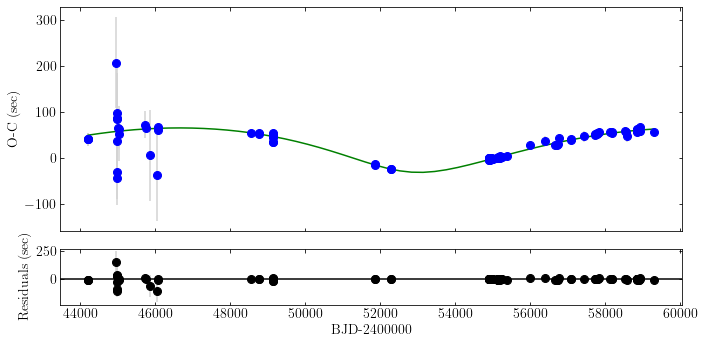

In [28]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = lnLTT_fit(x_line, *params) #### For all interporation 
#print(y_line)
#print(ocfit)
#print(x)

print(len(x_line))

#Reduced_chisqrt
n = 7
dof = len_x - n
Chi_sqr = ((y - oc_lnLTT_fit)**2/(dy)**2)/dof
Reduced_chisq_lnLTT = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_lnLTT)

N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='green')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_lnLTT_fit = y-oc_lnLTT_fit

ax1.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [29]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = lnLTT_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_lnLTT_fit_Beuermann.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnLTT_fit_Beuermann.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnLTT_Beuermann = Data_out[:,1]
y_range_lnLTT_Beuermann = Data_out[:,2]

#print(y_range)

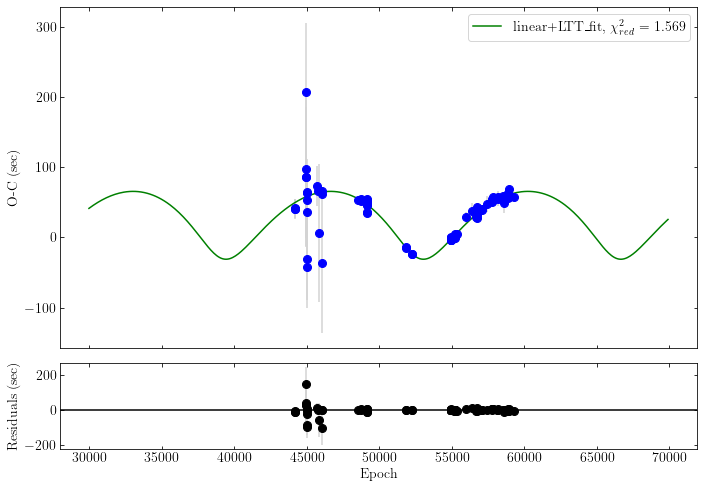

In [30]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '-', color='green',label='linear+LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnLTT)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("Beuermann_2011_ephemeris_determination_Figure3_OC_David_data.pdf", dpi=1200)

plt.show()

### Zooming residual plot

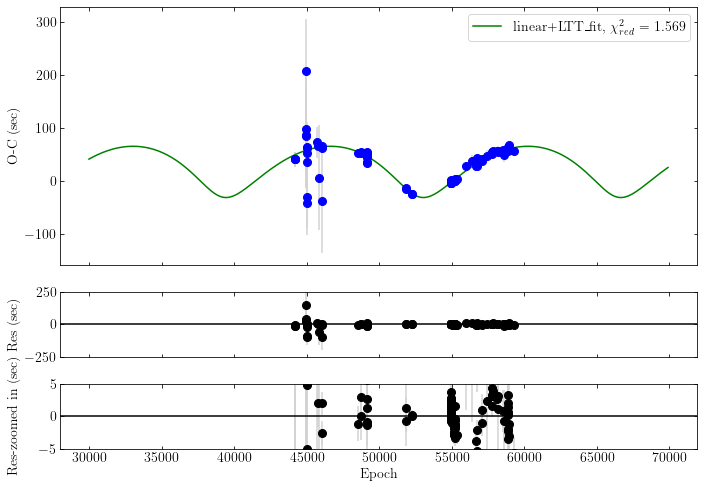

In [31]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1,1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax2.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '-', color='green',label='linear+LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnLTT)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Res (sec)')
ax2.set_ylabel('Res-zoomed in (sec)')


ax1.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
ax1.set_ylim(-250,250)

ax2.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax2.axhline(y=0, color='black', linestyle='-')
ax2.set_ylim(-5,5)
plt.savefig("Beuermann_2011_ephemeris_determination_Figure3_OC_David_data_zooming_res.pdf", dpi=1200)
fig.align_ylabels()

plt.show()